<a href="https://colab.research.google.com/github/kapilkn/Advanced-Data-Science-Capstone/blob/master/Survival_of_Titanic_Passenger_Kapil_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
import seaborn as sns
sns.set(style="white",color_codes=True)
sns.set(font_scale=1.5)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics

In [0]:
df_train =pd.read_csv('train.csv')

In [0]:
df_train.shape

(891, 12)

In [0]:
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [0]:
df_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [0]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [0]:
df_train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [0]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [0]:
df_train.shape

(891, 12)

In [0]:
df_train = df_train.drop(['PassengerId','Name','Ticket','Cabin'], axis =1)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [0]:
def age_approx(cols):
  age =cols[0]
  Pclass = cols[1]

  if pd.isnull(age):
    if Pclass ==1:
      return 37
    elif Pclass ==2:
      return 29
    else:
      return 24
  else:
    return age

In [0]:
df_train.groupby(['Pclass']).mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,37.0,0.416667,0.356481,84.154687
2,0.472826,29.0,0.402174,0.380435,20.662183
3,0.242363,NaN,0.615071,0.393075,13.675550


In [0]:
df_train["Age"] = df_train[['Age','Pclass']].apply(age_approx,axis=1)

In [0]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [0]:
df_train.dropna(inplace=True)
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [0]:
df_train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [0]:
df_train_dummies = pd.get_dummies(df_train,columns=['Sex'])

In [0]:
df_train_dummies = pd.get_dummies(df_train_dummies,columns=['Embarked'])

In [0]:
df_train_dummies.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,24.0,1,0,7.2500,0,1,0,0,1
1,1,1,37.0,1,0,71.2833,1,0,1,0,0
2,1,3,24.0,0,0,7.9250,1,0,0,0,1
3,1,1,37.0,1,0,53.1000,1,0,0,0,1
4,0,3,24.0,0,0,8.0500,0,1,0,0,1


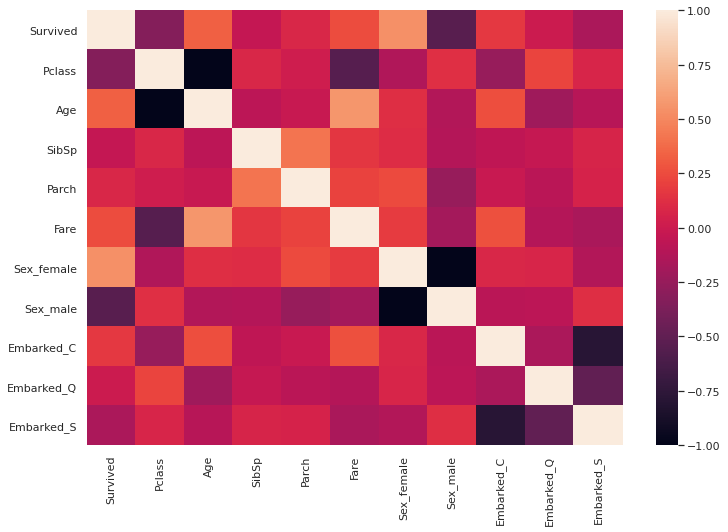

In [0]:
plt.figure(figsize=(12,8))
sns.heatmap(df_train_dummies.corr())

In [0]:
use_features = ['Pclass',	'Age',	'SibSp',	'Parch',	'Sex_female',	'Sex_male',	'Embarked_C',	'Embarked_Q',	'Embarked_S']
X = df_train_dummies[use_features].values
y = df_train_dummies['Survived']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [0]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(622, 9)
(267, 9)
(622,)
(267,)


In [0]:
LR = LogisticRegression()

In [0]:
LR.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred =LR.predict(X_test)

In [0]:
metrics.confusion_matrix(y_test,y_pred)

array([[140,  26],
       [ 24,  77]])

In [0]:
len(X_test)

267

In [0]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       166
           1       0.75      0.76      0.75       101

    accuracy                           0.81       267
   macro avg       0.80      0.80      0.80       267
weighted avg       0.81      0.81      0.81       267



In [0]:
LR.coef_

array([[-0.55028461,  0.03595133, -0.13924707, -0.01946786,  1.28237101,
        -1.11292826,  0.39616348,  0.02323001, -0.24995074]])

In [0]:
LR.intercept_

array([0.14526245])

In [0]:
df_train_dummies[use_features].columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

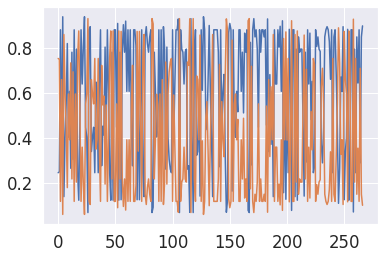

In [0]:
plt.plot(LR.predict_proba(X_test)) # Survive vs non survive

In [0]:
LR.predict_proba(X_test)

array([[0.24606657, 0.75393343],
       [0.24969603, 0.75030397],
       [0.88138782, 0.11861218],
       [0.3401016 , 0.6598984 ],
       [0.93939221, 0.06060779],
       [0.13963196, 0.86036804],
       [0.40379897, 0.59620103],
       [0.55138377, 0.44861623],
       [0.82027905, 0.17972095],
       [0.40379897, 0.59620103],
       [0.60771134, 0.39228866],
       [0.26574736, 0.73425264],
       [0.7816994 , 0.2183006 ],
       [0.30539443, 0.69460557],
       [0.88138782, 0.11861218],
       [0.40379897, 0.59620103],
       [0.79568237, 0.20431763],
       [0.24606657, 0.75393343],
       [0.12372732, 0.87627268],
       [0.48271561, 0.51728439],
       [0.88138782, 0.11861218],
       [0.6403651 , 0.3596349 ],
       [0.8045289 , 0.1954711 ],
       [0.93939221, 0.06060779],
       [0.44808474, 0.55191526],
       [0.40379897, 0.59620103],
       [0.06889994, 0.93110006],
       [0.88138782, 0.11861218],
       [0.89518989, 0.10481011],
       [0.3401016 , 0.6598984 ],
       [0.